In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../input/UpdatedResumeDataSet.csv',encoding='utf-8')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


25
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

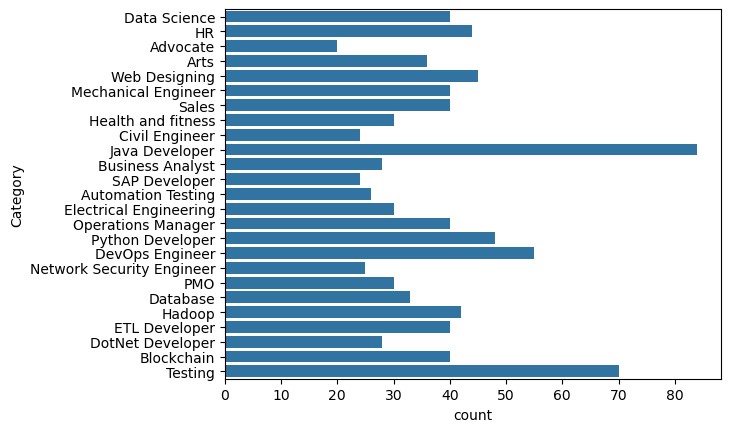

In [3]:
x = df['Resume']

# output data
y = df['Category']
print(len(y.unique()))
print(y.value_counts())
sns.countplot(y)


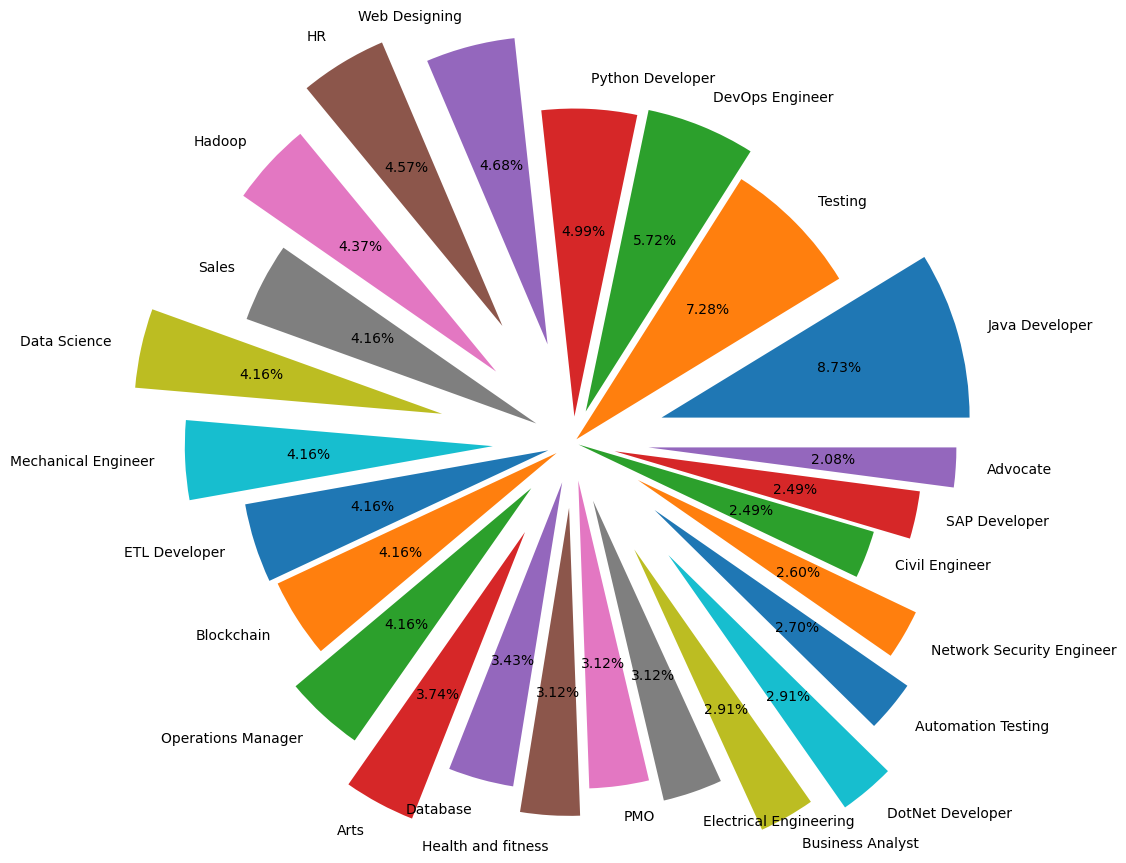

In [4]:
plt.figure(figsize=(10,10))
exp = [np.random.random()*0.5 for i in range(25)]
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%', explode=exp);

### def cleaning function

In [5]:
import re, string

def cleanResume(resumeText):
    resumeText = str(resumeText)
    resumeText = re.sub(r'http\S+\s*', ' ', resumeText)
    resumeText = re.sub(r'RT|cc', ' ', resumeText, flags=re.IGNORECASE)
    resumeText = re.sub(r'#\S+', ' ', resumeText)
    resumeText = re.sub(r'@\S+', ' ', resumeText)    
    resumeText = re.sub('[%s]' % re.escape(string.punctuation), ' ', resumeText)
    resumeText = re.sub(r'\s+', ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]', r'', resumeText)

    
    return resumeText.strip()

In [6]:
sent = ' \n Hi! @mahesh how are you?\n  Have you seen https://fb.com? #trend'
print(cleanResume(sent))

Hi how are you Have you seen


In [7]:
cleaned = x.apply(cleanResume)
cleaned_data = x.sum()
len(cleaned_data)

3040271

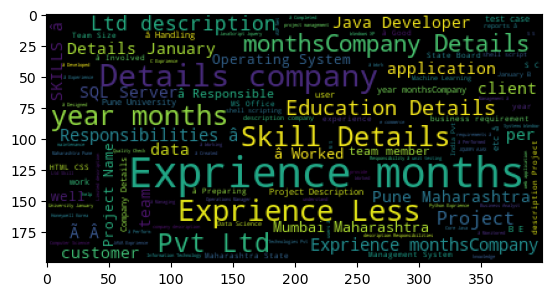

In [8]:
from wordcloud import WordCloud
wcloud = WordCloud().generate(cleaned_data)
plt.imshow(wcloud);

In [9]:
cleaned.shape, y.shape

((962,), (962,))

##### TF*IDF VECTORIZATION

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
x_new = tfidf.fit_transform(cleaned)
x_new.shape

(962, 7282)

In [11]:
tfidf.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'],
      shape=(7282,), dtype=object)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_new, y, random_state=0, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 7282), (241, 7282), (721,), (241,))

In [13]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(X_train, y_train)
nc.classes_

d:\DAI Aug-25\softwares\conda_env\dnn\Lib\site-packages\sklearn\neighbors\_nearest_centroid.py:244: UserWarning: self.within_class_std_dev_ has at least 1 zero standard deviation.Inputs within the same classes for at least 1 feature are identical.
  warnings.warn(


array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

<Figure size 1600x1600 with 0 Axes>

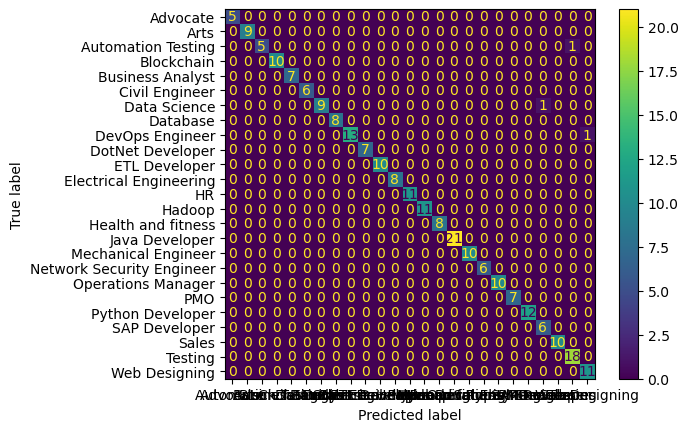

In [14]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = nc.predict(X_test)
plt.figure(figsize = (16,16))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [15]:
print(accuracy_score(y_test,y_pred))

0.9875518672199171


In [16]:
print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      0.83      0.91         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      0.90      0.95        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

## INPUT RESUME FROM OTHER FILE

In [17]:
file = open('../input/Sample_resume.txt','r')
data = file.readlines()
file.close()
data = " ".join(data)

In [36]:
cld = cleanResume(data)
cld = tfidf.transform([cld])
nc.predict(cld)


array(['Data Science'], dtype=object)

In [38]:
# OR (chirand method)
cld = cleanResume(data)
cld = pd.Series(cld)
cld = tfidf.transform(cld)
nc.predict(cld)


array(['Data Science'], dtype=object)

### another

In [43]:
from spire.doc import Document
doc = Document()
doc.LoadFromFile('../input/SPP.docx')
text = doc.GetText()
text

'Evaluation Warning: The document was created with Spire.Doc for Python.\r\nMr. Satish Prakashrao Pise\r\nEmail – satish.pise.sgp@gmail.com\t\t\t\tContact No. 9096679875,7768962144\r\nObjective\r\nWork with professional organization and contribute my excellent work with result oriented performance for continuous improvement in quality and development.  \r\nExperience – 6.3 Years\r\n1.  Current working in Sanjay Ghodawat Polytechnic, Kolhapur.\r\n* Post-Lecturer \r\n* Duration- 4.3 years, 1st June 2013 to till date\r\n* Responsibilities - Teaching, guiding, motivating students as a class teacher, lecturer, and working as a lab in-charge, spoken tutorial project, IIT Bombay coordinator.\r\nOrganizing and conducting trainings for students.\r\n* Subject Taught – RDBMS, CNE, CMF, CHM, CHN, NMA, LPR, DLS, GUI, BWP.\r\n2.  Samarth Polytechnic Belhe, Pune\r\n* Post-Lecturer(Ad-hoc)\r\n* Duration-8months, August 2012 to April 2013\r\n* Responsibilities – Teaching.\r\n* Subject Taught – CMF, MIS

In [44]:
cld = cleanResume(text)
cld = tfidf.transform([cld])
nc.predict(cld)

array(['Arts'], dtype=object)